<!-- HTML file automatically generated from DocOnce source (https://github.com/doconce/doconce/)
doconce format html Secondmidterm2023.do.txt --no_mako -->
<!-- dom:TITLE: PHY321: Classical Mechanics 1 -->

# PHY321: Classical Mechanics 1
**Second midterm project, due Sunday  April 16**

Name: **Cesarine Graham**

Date: **Apr 3, 2023**

In [1]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

<span style="color:black">
    
### Borrowed Class from Dr. Jensen's Notes:

In [2]:
# useful constants
G = 6.67408e-11 # gravitational constant [AU^3/(kg yr^2)]
day = 3600*24 # s in one day
yr = 365.24219*day # s in one yr
AU = 1.496e8 # km in 1 AU
G_AU_yr = G/((1.496e11)**3/(365.24219*day)**2)

dt = 0.001 # timestep [yr]
t = np.arange(0, 10, dt)

class SSbody:
    def __init__(self, m=0.0, ecc=0.0, rmin=0.0, L=0.0, interval=0):
        self.m = m
        self.ecc = ecc
        self.rmin = rmin
        self.r = np.zeros(shape=(interval, 3))
        self.v = np.zeros(shape=(interval, 3))
    
    def set_r0(self, r0):
        shape = np.shape(r0)
        if shape == (3,):
            self.r0 = r0
        else:
            print('cannot assign position vector of shape',shape)
        self.r0 = r0
        self.r[0] = r0
    
    def set_v0(self, v0):
        shape = np.shape(v0)
        if shape == (3,):
            self.v0 = v0
        else:
            print('cannot assign position vector of shape',shape)
        self.v0 = v0
        self.v[0] = v0
  
#Sun System
Sun = SSbody(m=1.989e30, interval=len(t))
Sun_r0 = np.array([0.0/AU, 
                   0.0/AU, 
                   0.0/AU])
Sun_v0 = np.array([0*yr/AU, 
                   0*yr/AU, 
                   0*yr/AU])
Sun.set_r0(Sun_r0)
Sun.set_v0(Sun_v0)

#Earth System
Earth = SSbody(m=6e24, interval=len(t))
Earth_r0 = np.array([1.174416627785351e8/AU, 
                     9.090417158007471e7/AU, 
                     -4.258129244633019e3/AU])
Earth_v0 = np.array([-1.871270957913577e1*yr/AU, 
                     2.343419984574745e1*yr/AU, 
                     -1.734424680682523e-3*yr/AU])
Earth.set_r0(Earth_r0)
Earth.set_v0(Earth_v0)


alpha = G_AU_yr*Sun.m*Earth.m

### Part 1 (50pt), the inverse-square law and the stability of planetary orbits

In our lectures (see also Taylor chapter 8)  we have studied an attractive potential

$$
V(r)=-\alpha/r,
$$

where the quantity $r$ is the absolute value of the relative position
and $\alpha$ is a constant.

When we rewrote the equations of motion in polar coordinates, we found the
analytical solution to the radial equation of motion

$$
r(\phi) = \frac{c}{1+\epsilon\cos{(\phi)}},
$$

where $c=L^2/\mu\alpha$, with
the reduced mass $\mu$ and the angular momentum $L$, as
discussed during the lectures. With the transformation of a two-body
problem to the center-of-mass frame, the actual equations look like an
*effective* one-body problem. 

The quantity $\epsilon$ is what we called the eccentricity. Since we
will mainly study bounded orbits, we have $0 \le \epsilon < 1$.  For
the Earth, the orbit is indeed close to circular and at perihelion
(the closest distance to the Sun), the Earth's center is about 0.98329
astronomical units (AU) or 147,098,070 km from the Sun's center. For
Earth, the orbital eccentricity is $\epsilon\approx 0.0167$. The outer
planets have more elliptical orbits. For example, Mars has its
perihelion at 206,655,215 km and its apehelion at 249,232,432 km.

In this part we will limit ourselves to the Earth-Sun system we
studied in homework 5. You can reuse your code with either the
Velocity-Verlet or the Euler-Cromer algorithms from homework 5.

This means also that $\alpha=GM_{\odot}M_{\mathrm{Earth}}$. We will
use $\alpha$ as a shorthand in the equations here. Keep in mind that
in homework 5 you scaled $GM_{\odot}=4\pi^2$ in your code.

The exercises here are all based on you analyzing the results from your codes from homework 5. Homework 8 is also useful.

As a reminder, we list the equations we studied in homework 5.
Newton's law of gravitation is given by a force $F_G$ (we assume this
is the force acting on Earth from the Sun)

$$
F_G=-\frac{GM_{\odot}M_{\mathrm{Earth}}}{r^2},
$$

where $M_{\odot}$ is the mass of the Sun and $M_{\mathrm{Earth}}$ is
the mass of the Earth. The gravitational constant is $G$ and $r$ is
the distance between the Earth and the Sun.  We assumed that the Sun
has a mass which is much larger than that of the Earth. We could
therefore safely neglect the motion of the Sun.

In homework 5 we assumed that the orbit of the Earth around the Sun 
was co-planar, and we took this to be the $xy$-plane.
Using Newton's second law of motion we got the following equations

$$
\frac{d^2x}{dt^2}=-\frac{F_{G,x}}{M_{\mathrm{Earth}}},
$$

and

$$
\frac{d^2y}{dt^2}=-\frac{F_{G,y}}{M_{\mathrm{Earth}}},
$$

where $F_{G,x}$ and $F_{G,y}$ are the $x$ and $y$ components of the
gravitational force.

You can obviously set $\alpha=GM_{\odot}M_{\mathrm{Earth}}$.

### 1a (10pt) Use now your code from homework 5 or homeowrk 8 (in cartesian coordinates). Start with a circular orbit (this corresponds to  setting $\epsilon=0$ for the equations in Polar coordinates), and plot $x$ versus $y$. How would you choose the initial conditions to obtain a circular orbit?  **Note that your code should be set up  in Cartesian coordinates**.

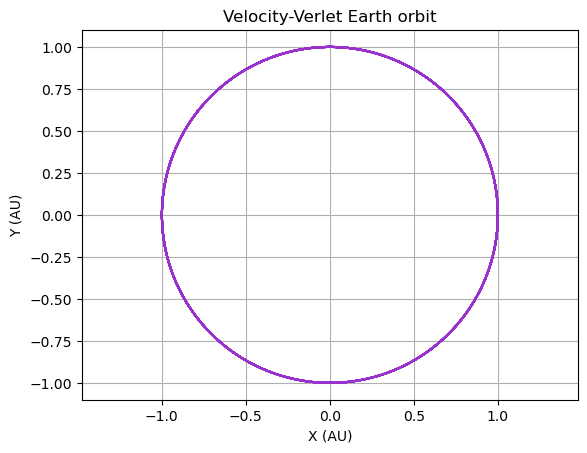

In [3]:
#1a:

def a(ri, mbody):
    rnorm = np.linalg.norm(ri)
    a = -(alpha/mbody)*ri / rnorm**3
    return a

def VVorbit(r0, v0, mbody):
    r = np.zeros((len(t),3))
    v = np.zeros((len(t),3))
    r[0] = r0
    v[0] = v0
    for i in range(len(t)-1):
        a_i = a(r[i], mbody)
        r[i+1] = r[i] + dt*v[i] + 0.5*(dt**2)*a_i
        a_ip1 = a(r[i+1], mbody)
        v[i+1] = v[i] + 0.5*dt*(a_i + a_ip1)
    return r, v

r0 = np.array([1,0,0])
v0 = np.array([0,2*np.pi,0])
r, v = VVorbit(r0, v0, Earth.m)

plt.plot(r[:,0], r[:,1], color='darkorchid')
plt.xlabel('X (AU)')
plt.ylabel('Y (AU)')
plt.grid()
plt.title('Velocity-Verlet Earth orbit')
plt.axis('equal');

### 1b (10pt) Check that for the case of a circular orbit that both the kinetic and the potential energies are conserved. Why do we expect such a result if we have a circular orbit? 

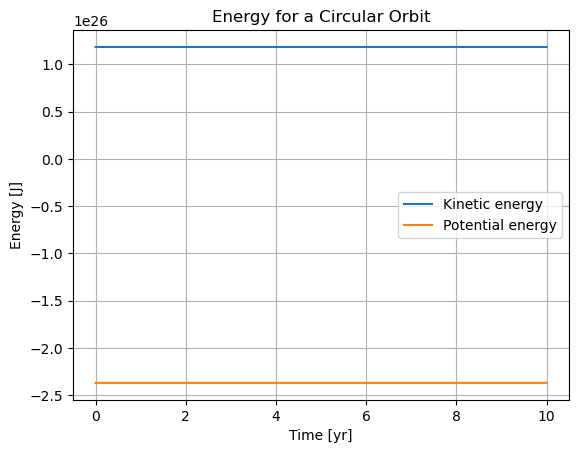

In [4]:
#1b:

K = np.zeros(len(t))
V = np.zeros(len(t))

for i in range(len(t)):
    v_mag = np.linalg.norm(v[i])
    r_mag = np.linalg.norm(r[i])
    K[i] = 0.5*Earth.m*v_mag**2
    V[i] = -alpha/r_mag

plt.plot(t, K, label='Kinetic energy')
plt.plot(t, V, label='Potential energy')
plt.title('Energy for a Circular Orbit')
plt.xlabel('Time [yr]')
plt.ylabel('Energy [J]')
plt.legend()
plt.grid()

<span style="color:darkorchid">

### Energy is conserved in a circular orbit because the gravitational force is a conservative force. In a circular orbit, an object is constantly being pulled towards the center of the orbit by the force of gravity. As the object moves towards the center, its potential energy decreases, but its kinetic energy increases as it gains speed. As it moves away from the center, the opposite occurs: potential energy increases and kinetic energy decreases. This cycle continues for the entirety of the orbit.

### 1c (10pt) With the same initial conditions (circular orbit) use Kepler's second law (see Taylor section 3.4) to show that angular momentum is conserved. Compare the value you get with the angular momentum you get from a circular orbit. 

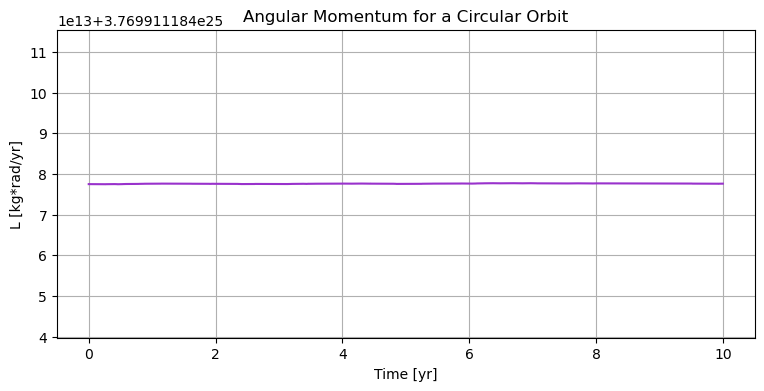

In [5]:
#1c

L = np.zeros(len(t))
for i in range(len(t)):
    L[i] = Earth.m*np.linalg.norm(np.cross(r[i],v[i]))

plt.figure(figsize=(9,4))
plt.plot(t, L, color='darkorchid')
plt.title('Angular Momentum for a Circular Orbit')
plt.xlabel('Time [yr]')
plt.ylabel('L [kg*rad/yr]')
plt.grid()

<span style="color:darkorchid">

    
### Angular momentum is conserved in a circular orbit due to the conservation of angular momentum. More specifically, the object is constantly being pulled towards the center of the orbit by the gravitational force. However, since the gravitational force always acts perpendicular to the object's velocity, it does not produce any torque on the object. Therefore, the object's angular momentum remains constant throughout the orbit. This is why the plot appears as a flat line.

### 1d (10pt) Till now we have assumed that we have an inverse-square force $F(r) = -\alpha/r^2$. Let us rewrite this force as $F(r) =-\alpha/r^{\beta}$ with $\beta=[2,3,4]$. **Note**: in your code you are setting the force in say for example the $x$-direction (the same applies to the $y$- and/or eventual $z$-directions to $F(r) = -(\alpha/r^3)x$. It means that when you study the dependence on the parameter $\beta$, you need to add $1$ to the power. Run your Sun-Earth code with these values of $\beta$ and plot $x$ versus $y$ (you can use the same initial conditions or switch to eliptical orbits). Discuss your results. Can you use the observations of planetary motion to determine by what amount Nature deviates from a perfect inverse-square law? 

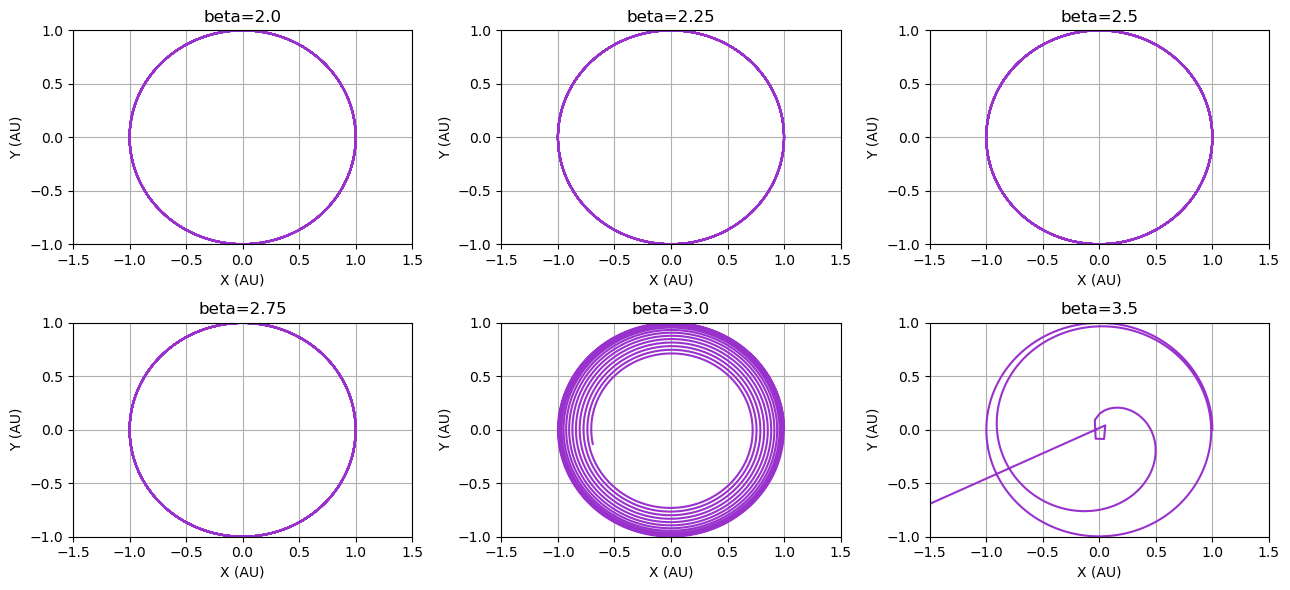

In [6]:
# 1d

beta = np.array([2.00, 2.25, 2.50, 2.75, 3.00, 3.50])

def ba(ri, mbody, beta):
    rnorm = np.linalg.norm(ri)
    a = -(alpha/mbody)*ri / rnorm**(beta+1)
    return a

def bVVorbit(r0, v0, mbody, beta):
    r = np.zeros((len(t),3))
    v = np.zeros((len(t),3))
    r[0] = r0
    v[0] = v0
    for i in range(len(t)-1):
        a_i = ba(r[i], mbody, beta)
        r[i+1] = r[i] + dt*v[i] + 0.5*(dt**2)*a_i
        a_ip1 = ba(r[i+1], mbody, beta)
        v[i+1] = v[i] + 0.5*dt*(a_i + a_ip1)
    return r, v

plt.figure(figsize=(13,6))

for i in range(len(beta)):
    r, v = bVVorbit(r0, v0, Earth.m, beta[i])
    plt.subplot(2,3,i+1)
    plt.plot(r[:,0], r[:,1], color='darkorchid')
    plt.xlabel('X (AU)')
    plt.ylabel('Y (AU)')
    plt.grid()
    plt.title('beta='+str(beta[i]))
    plt.xlim(-1.5,1.5)
    plt.ylim(-1.0,1.0)
    
plt.tight_layout()

<span style="color:darkorchid">

### The Earth's deviation in the system is not easily noticeable until the value of 𝛽 = 3. When 𝛽 = 3, the Earth's orbit starts to spiral inward toward the Sun and the radius of the orbit begins to decrease. This is an expected outcome due to the power of 3 in the denominator of the gravitational force between the Sun and the Earth. As the radius of the Earth's orbit is less than 1 AU, the attractive force between the Earth and the Sun increases as the radius decreases. Additionally, the gravitational force equation with a power of 3.5 in the denominator produces more unusual behavior for the Earth.

### 1e (10pt) Consider now an elliptical orbit with an initial position 1 AU from the Sun and an initial  velocity of 5 AU/yr. Show that the total energy is a constant (the kinetic and potential energies will vary). Show also that the angular momentum is a constant. If you change the parameter $\beta$ in $F(r) = -\alpha/r^{\beta}$ from $\beta=2$ to $\beta=3$ and $\beta =4.0$, are these quantities (energy and angular momentum) conserved?  Discuss your results. (Hint: relate your results to Kepler's laws and figure out whether these are energy conserving forces).

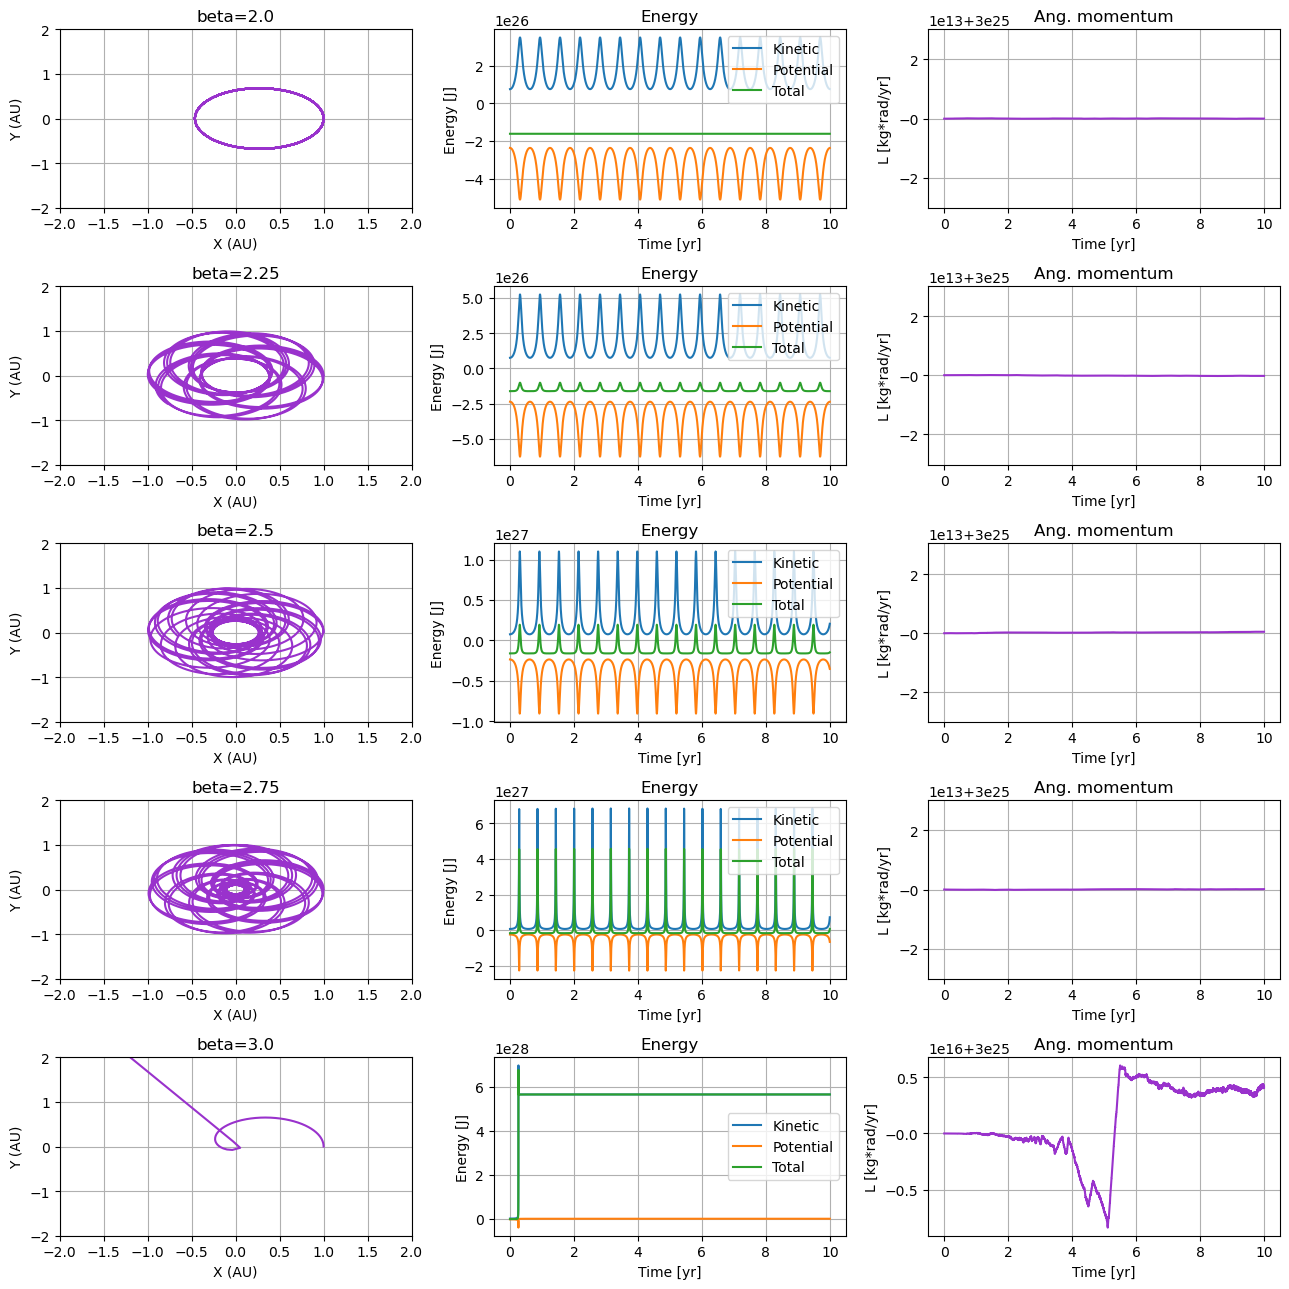

In [7]:
# 1e

r0 = np.array([1,0,0])
v0 = np.array([0,5,0])
beta = np.array([2.00, 2.25, 2.50, 2.75, 3.00])

plt.figure(figsize=(13,13))

for i in range(len(beta)):
    r, v = bVVorbit(r0, v0, Earth.m, beta[i])    
    K = np.zeros(len(t))
    V = np.zeros(len(t))
    E = np.zeros(len(t))
    L = np.zeros(len(t))
    
    for j in range(len(t)):
        v_mag = np.linalg.norm(v[j])
        r_mag = np.linalg.norm(r[j])
        K[j] = 0.5*Earth.m*v_mag**2
        V[j] = -alpha/r_mag
        E[j] = K[j] + V[j]
        L[j] = Earth.m*np.linalg.norm(np.cross(r[j],v[j]))
    
    plt.subplot(5,3,(3*i)+1)
    plt.plot(r[:,0], r[:,1], color='darkorchid')
    plt.xlabel('X (AU)')
    plt.ylabel('Y (AU)')
    plt.grid()
    plt.title('beta='+str(beta[i]))
    plt.xlim(-2.0,2.0)
    plt.ylim(-2.0,2.0)
    
    plt.subplot(5,3,(3*i)+2)
    plt.plot(t, K, label='Kinetic')
    plt.plot(t, V, label='Potential')
    plt.plot(t, E, label='Total')
    plt.title('Energy')
    plt.xlabel('Time [yr]')
    plt.ylabel('Energy [J]')
    plt.legend()
    plt.grid()
    
    plt.subplot(5,3,(3*i)+3)
    plt.plot(t, L, color='darkorchid')
    plt.title('Ang. momentum')
    plt.xlabel('Time [yr]')
    plt.ylabel('L [kg*rad/yr]')
    plt.grid()
    
plt.tight_layout()

<span style="color:darkorchid">

### When an inverse square law is in effect, Kepler's laws apply to bounded orbits, with angular momentum and total energy being conserved. However, when $\beta$ deviates from an inverse square law and the Earth is not at a constant radius, total energy is no longer conserved. Until $\beta$ reaches 3, Earth's motion appears as an unbounded orbit, but before then, Earth follows Kepler's first law, with its orbit taking the shape of an ellipse and the Sun situated at one focus. 

### Part 2 (50pt), making a program for the solar system

Our final aim is to write a code which includes the known planets of the solar system. 

We will, as before, use so-called astronomical units when rewriting our equations. 
Using astronomical units (AU as abbreviation)it means that 
one astronomical unit of length, known as 1 AU, is the average distance between the Sun and Earth, that is
$1$ AU = $1.5\times 10^{11}$ m.  It can also be convenient to use years instead of seconds since years match
better the time evolution of the solar system. The mass of the Sun is $M_{\mathrm{sun}}=M_{\odot}=2\times 10^{30}$ kg. The masses of all relevant planets and their distances from the sun are listed in here in kg and AU.

1. Earth with mass  $M_{\mathrm{Earth}}=6\times 10^{24}$ kg and distance to sun  1AU

2. Jupiter with mass  $M_{\mathrm{Jupiter}}=1.9\times 10^{27}$ kg and distance to the Sun 5.20 AU

3. Mars  with mass $M_{\mathrm{Mars}}=6.6\times 10^{23}$ kg and distance to the Sun 1.52 AU 

4. Venus with mass $M_{\mathrm{Venus}}=4.9\times 10^{24}$ kg and distance to the Sun 0.72 AU 

5. Saturn with mass $M_{\mathrm{Saturn}}=5.5\times 10^{26}$ kg and distance to the Sun 9.54 AU 

6. Mercury with mass $M_{\mathrm{Mercury}}=3.3\times 10^{23}$ kg and distance to the Sun 0.39 AU

7. Uranus  with mass $M_{\mathrm{Uranus}}=8.8\times 10^{25}$ kg and distance to the Sun 19.19 AU

8. Neptun with mass $M_{\mathrm{Neptun}}=1.03\times 10^{26}$ kg and distance to the Sun 30.06 AU

9. Pluto with  $M_{\mathrm{Pluto}}=1.31\times 10^{22}$ kg  and distance to the Sun 39.53 AU

Pluto is no longer considered a planet, but we add it here for
historical reasons. It is optional in this midterm project to include
Pluto.

In setting up the equations we can limit ourselves to a co-planar
motion and use only the $x$ and $y$ coordinates. But you should feel
free to extend your equations to three dimensions, it is not very
difficult and the data from NASA are all in three dimensions.
You find these data at the 
[NASA](http://www.nasa.gov/index.html) has an excellent site at <https://ssd.jpl.nasa.gov/horizons/app.html#/> site.
From there you can extract initial conditions in order to start your
differential equation solver.  At the above website you need to change
from **OBSERVER** to **VECTOR** and then write in the planet you are
interested in.  The generated data contain the $x$, $y$ and $z$ values
as well as their corresponding velocities. The velocities are in units
of AU per day.  Alternatively they can be obtained in terms of km and
km/s.

We will start with  the three-body problem, still with the Sun kept
fixed as the center of mass of the system but including Jupiter (the
most massive planet in the solar system, having a mass that is
approximately 1000 times smaller than that of the Sun) together with
the Earth. This leads to a three-body problem. Without Jupiter, the
Earth's motion is stable and unchanging with time. The aim here is to
find out first how much Jupiter alters the Earth's motion.

The program you have developed in homework 5  can easily be modified by
simply adding the magnitude of the force between the Earth and
Jupiter.

This force is given again by (without vector symbols, only as function of the value of the relative distance)

$$
F_{\mathrm{Earth-Jupiter}}=-\frac{GM_{\mathrm{Jupiter}}M_{\mathrm{Earth}}}{r_{\mathrm{Earth-Jupiter}}^2},
$$

where $M_{\mathrm{Jupiter}}$ is the mass of Jupyter and
$M_{\mathrm{Earth}}$ is the mass of the Earth.  The gravitational constant
is $G$ and $r_{\mathrm{Earth-Jupiter}}$ is the distance between Earth
and Jupiter.

We assume again that the orbits of the two planets are co-planar, and
we take this to be the $xy$-plane (you can easily extend the equations
to three dimensions, feel free to run your calculations in two or three dimensions).

### 2a (20pt) Modify your coupled first-order differential equations from homework 5 in order to accomodate both the motion of the Earth and Jupiter by taking into account the distance in $x$ and $y$ between the Earth and Jupiter. Write out the differential equations for  Earth and Jupyter, keeping the Sun at rest (mass center of the system). Scale these equations in terms of Astronomical Units.

In [8]:
t = np.arange(0,80,0.01)

In [9]:
#sun system
Sun = SSbody(m=2.0e30, interval=len(t))
Sun_r0 = np.array([0.0/AU, 
                   0.0/AU, 
                   0.0/AU])
Sun_v0 = np.array([0*yr/AU, 
                   0*yr/AU, 
                   0*yr/AU])
Sun.set_r0(Sun_r0)
Sun.set_v0(Sun_v0)

#earth system
Earth = SSbody(m=6e24, interval=len(t))
Earth_r0 = np.array([1.174416627785351e8/AU, 
                     9.090417158007471e7/AU, 
                     -4.258129244633019e3/AU])
Earth_v0 = np.array([-1.871270957913577e1*yr/AU, 
                     2.343419984574745e1*yr/AU, 
                     -1.734424680682523e-3*yr/AU])
Earth.set_r0(Earth_r0)
Earth.set_v0(Earth_v0)

#jupiter system
Jupiter = SSbody(m=1.9e27, interval=len(t))
Jupiter_r0 = np.array([3.977599721983880e8/AU, 
                       -6.540243438328012e8/AU, 
                       -6.182831600373298e6/AU])
Jupiter_v0 = np.array([1.101748351600853e1*yr/AU, 
                       7.412172929202125e0*yr/AU, 
                       -2.773305886847099e-1*yr/AU])
Jupiter.set_r0(Jupiter_r0)
Jupiter.set_v0(Jupiter_v0)

In [10]:
def a(m_body, ri_body, ri_Sun, ri_Earth, ri_Jupiter, E, J):
    
    rvec_Sun = ri_body - ri_Sun # relative position between body and Sun
    a_Sun = -(alpha/E.m)*(rvec_Sun) / np.linalg.norm(rvec_Sun)**3 # a due to F from Sun
    
    rvec_Earth = ri_body - ri_Earth # relative position between body and Earth
    a_Earth = 0
    if round(np.linalg.norm(rvec_Earth),10) != 0:
        # a due to F from Earth
        a_Earth = -( alpha*E.m/(m_body*Sun.m) )*(rvec_Earth) / np.linalg.norm(rvec_Earth)**3 
    
    rvec_Jupiter = ri_body - ri_Jupiter # relative position between body and Jupiter
    a_Jupiter = 0
    if round(np.linalg.norm(rvec_Jupiter),10) != 0:
        # a due to F from Jupiter
        a_Jupiter = -( alpha*J.m/(m_body*E.m*Sun.m) )*(rvec_Jupiter) / np.linalg.norm(rvec_Jupiter)**3
    
    a = a_Sun + a_Earth + a_Jupiter
    
    return a

def VVorbit(E, J):

    for i in range(len(t)-1):
        # Earth
        ai_Earth = a(E.m, E.r[i], Sun_r0, E.r[i], J.r[i], E, J)
        E.r[i+1] = E.r[i] + dt*E.v[i] + 0.5*(dt**2)*ai_Earth
        
        # Jupiter
        ai_Jupiter = a(J.m, J.r[i], Sun_r0, E.r[i], J.r[i], E, J)
        J.r[i+1] = J.r[i] + dt*J.v[i] + 0.5*(dt**2)*ai_Jupiter
        
        # Earth + 1
        aip1_Earth = a(E.m, E.r[i+1], Sun_r0, E.r[i+1], J.r[i+1], E, J)
        E.v[i+1] = E.v[i] + 0.5*dt*(ai_Earth + aip1_Earth)
        
        # Jupiter + 1
        aip1_Jupiter = a(J.m, J.r[i+1], Sun_r0, E.r[i+1], J.r[i+1], E, J)
        J.v[i+1] = J.v[i] + 0.5*dt*(ai_Jupiter + aip1_Jupiter)

### 2b (10pt) Use either the Euler-Cromer or Velocity-Verlet algorithms to compute the positions of the Earth and Jupiter. Repeat the calculations by increasing the mass of Jupiter by a factor of 10, 100 and 1000 and plot the position of the Earth.  Discuss your results and study the stability of this three-body system as function of the chosen masses for Jupiter.

In [11]:
# positions of Earth and Jupiter, accurate masses
VVorbit(Earth, Jupiter)

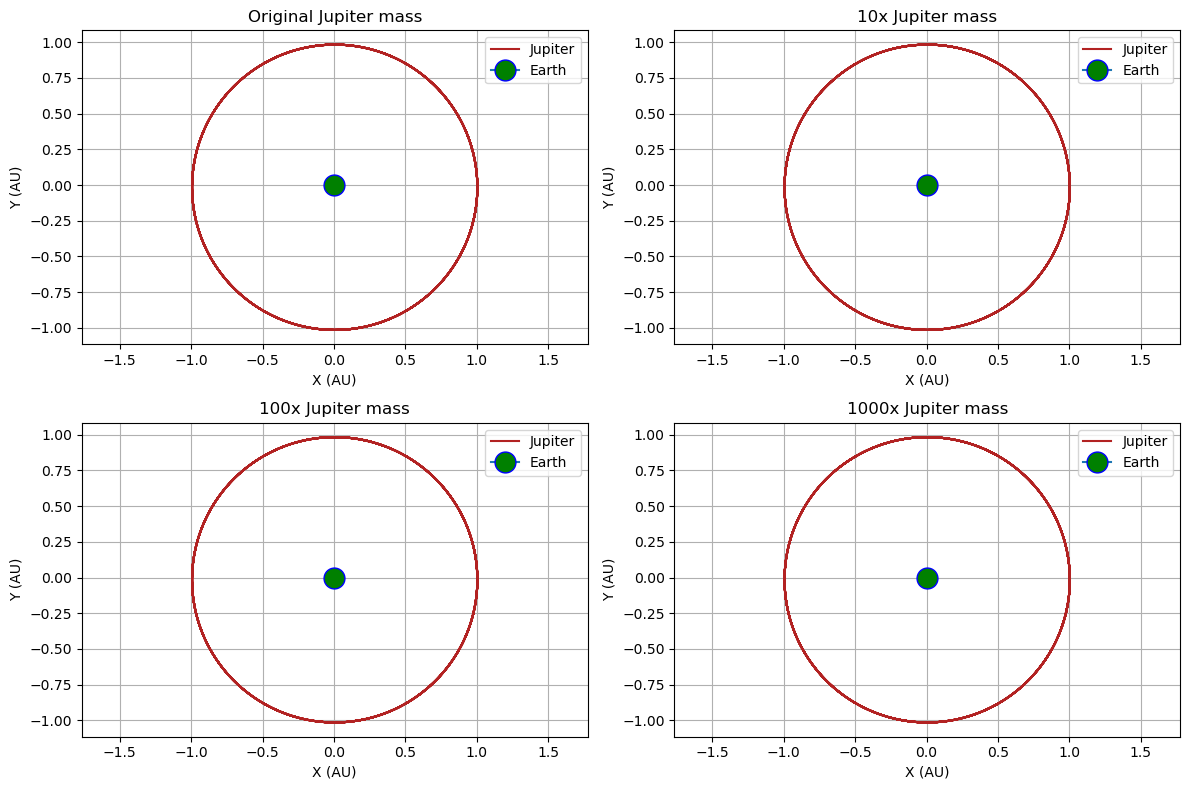

In [12]:
Jupiter10 = SSbody(m=1.9e28, interval=len(t))
Jupiter10.set_r0(Jupiter_r0)
Jupiter10.set_v0(Jupiter_v0)

Earth10 = SSbody(m=6e24, interval=len(t))
Earth10.set_r0(Earth_r0)
Earth10.set_v0(Earth_v0)

# positions of Earth and Jupiter, 10 x Jupiter's mass
VVorbit(Earth10, Jupiter10)

Jupiter100 = SSbody(m=1.9e29, interval=len(t))
Jupiter100.set_r0(Jupiter_r0)
Jupiter100.set_v0(Jupiter_v0)

Earth100 = SSbody(m=6e24, interval=len(t))
Earth100.set_r0(Earth_r0)
Earth100.set_v0(Earth_v0)

# positions of Earth and Jupiter, 100 x Jupiter's mass
VVorbit(Earth100, Jupiter100)

Jupiter1000 = SSbody(m=1.9e30, interval=len(t))
Jupiter1000.set_r0(Jupiter_r0)
Jupiter1000.set_v0(Jupiter_v0)

Earth1000 = SSbody(m=6e24, interval=len(t))
Earth1000.set_r0(Earth_r0)
Earth1000.set_v0(Earth_v0)

# positions of Earth and Jupiter, 1000 x Jupiter's mass
VVorbit(Earth1000, Jupiter1000)

plt.figure(figsize=(12,8))

plt.subplot(2,2,1)
plt.plot(Earth.r[:,0], Earth.r[:,1], label='Jupiter', color='firebrick')
plt.plot(0, 0, marker="o", markersize=15, markeredgecolor="blue", markerfacecolor="green", label='Earth')
plt.xlabel('X (AU)')
plt.ylabel('Y (AU)')
plt.legend()
plt.grid()
plt.title('Original Jupiter mass')
plt.axis('equal');

plt.subplot(2,2,2)
plt.plot(Earth10.r[:,0], Earth10.r[:,1], label='Jupiter', color='firebrick')
plt.plot(0, 0, marker="o", markersize=15, markeredgecolor="blue", markerfacecolor="green", label='Earth')
plt.xlabel('X (AU)')
plt.ylabel('Y (AU)')
plt.legend()
plt.grid()
plt.title('10x Jupiter mass')
plt.axis('equal');

plt.subplot(2,2,3)
plt.plot(Earth100.r[:,0], Earth100.r[:,1], label='Jupiter', color='firebrick')
plt.plot(0, 0, marker="o", markersize=15, markeredgecolor="blue", markerfacecolor="green", label='Earth')
plt.xlabel('X (AU)')
plt.ylabel('Y (AU)')
plt.legend()
plt.grid()
plt.title('100x Jupiter mass')
plt.axis('equal');

plt.subplot(2,2,4)
plt.plot(Earth1000.r[:,0], Earth1000.r[:,1], label='Jupiter', color='firebrick')
plt.plot(0, 0, marker="o", markersize=15, markeredgecolor="blue", markerfacecolor="green", label='Earth')
plt.xlabel('X (AU)')
plt.ylabel('Y (AU)')
plt.legend()
plt.grid()
plt.title('1000x Jupiter mass')
plt.axis('equal');

plt.tight_layout();

<span style="color:darkorchid">
    
    
### If Jupiter's mass were to increase, it would exert a stronger gravitational force on the other objects in the solar system, including the Earth. This would cause the Earth's orbit to change, as the gravitational force between the Sun and the Earth is not the only force acting on the Earth in its orbit. However, the effect of Jupiter's increased mass on the Earth's orbit would be relatively small, as Jupiter is much further from the Sun than the Earth, and its gravitational influence on the Earth is much weaker than the Sun's. In fact, Jupiter's gravitational influence on the Earth is already taken into account in the calculations of the Earth's orbit, as part of the overall gravitational field of the solar system. The Earth's orbit is primarily determined by the gravitational force between the Earth and the Sun, which is much stronger than any other gravitational force acting on the Earth. As a result, even if Jupiter's mass were to increase significantly, the effect on the Earth's orbit would be relatively small and would not cause a significant change in the Earth's orbit.

### 2c (20pt) Since the Sun is much more massive than all the other planets, we will define the Sun as our center of mass and set its velocity and position to zero.  Our final task is to add the remaining known planets and simulate the solar system asfunction of time. Add gradually one planet at the time. Develop a code which simulates the solar system with the above planets and plot their orbits. Discuss your results.

In [13]:
class SSbody:
    def __init__(self, m=0.0, ecc=0.0, rmin=0.0, L=0.0, interval=0):
        self.m = m
        self.ecc = ecc
        self.rmin = rmin
        self.r = np.zeros(shape=(interval, 3))
        self.v = np.zeros(shape=(interval, 3))
    
    def set_r0(self, r0):
        shape = np.shape(r0)
        if shape == (3,):
            self.r0 = r0
        else:
            print('shape error')
        self.r0 = r0
        self.r[0] = r0
    
    def set_v0(self, v0):
        shape = np.shape(v0)
        if shape == (3,):
            self.v0 = v0
        else:
            print('shape error')
        self.v0 = v0
        self.v[0] = v0
        
    def update_r(self, i, Sun, Me, V, E, Ma, J, S, U, N, P, a_func):
        ai = a_func(self.m, self.r[i], 
               Sun, Me.r[i], V.r[i], E.r[i], Ma.r[i], 
               J.r[i], S.r[i], U.r[i], N.r[i], P.r[i])
        self.r[i+1] = self.r[i] + dt*self.v[i] + 0.5*(dt**2)*ai
        return ai
    
    def update_v(self, i, Sun, Me, V, E, Ma, J, S, U, N, P, ai, a_func):
        aip1 = a_func(self.m, self.r[i+1], 
                 Sun, Me.r[i+1], V.r[i+1], E.r[i+1], Ma.r[i+1], 
                 J.r[i+1], S.r[i+1], U.r[i+1], N.r[i+1], P.r[i+1])
        self.v[i+1] = self.v[i] + 0.5*dt*(ai + aip1)
        
dt = 0.01 
t = np.arange(0, 250, dt) #250 years


Sun = SSbody(m=2.0e30, interval=len(t))
Sun_r0 = np.array([0.0/AU, 
                   0.0/AU, 
                   0.0/AU])
Sun_v0 = np.array([0*yr/AU, 
                   0*yr/AU, 
                   0*yr/AU])

Mercury = SSbody(m=3.3e23, interval=len(t))
Mercury_r0 = np.array([2.027767407850776e7/AU, 
                       4.150208362179492e7/AU, 
                       1.531266817671852e6/AU])
Mercury_v0 = np.array([-5.350271745403523e1*yr/AU, 
                        2.329003069515758e1*yr/AU, 
                        6.811041874149740e0*yr/AU])

Venus = SSbody(m=4.9e24, interval=len(t))
Venus_r0 = np.array([-7.147162739469874e7/AU, 
                     8.009392904495341e7/AU, 
                         5.223477461228345e6/AU])
Venus_v0 = np.array([-2.625450484896109e1*yr/AU, 
                     -2.350556766692479e1*yr/AU, 
                     1.192476444770253e0*yr/AU])

Earth = SSbody(m=6e24, interval=len(t))
Earth_r0 = np.array([1.174416627785351e8/AU, 
                     9.090417158007471e7/AU, 
                     -4.258129244633019e3/AU])
Earth_v0 = np.array([-1.871270957913577e1*yr/AU, 
                     2.343419984574745e1*yr/AU, 
                     -1.734424680682523e-3*yr/AU])

Mars = SSbody(m=6.6e23, interval=len(t))
Mars_r0 = np.array([1.838707867070253e8/AU, 
                    1.102762298966132e8/AU, 
                    -2.199647162993260e6/AU])
Mars_v0 = np.array([-1.153682916415408e1*yr/AU, 
                    2.284665054379941e1*yr/AU, 
                    7.617993214763281e-1*yr/AU])

Jupiter = SSbody(m=1.9e27, interval=len(t))
Jupiter_r0 = np.array([3.977599721983880e8/AU, 
                       -6.540243438328012e8/AU, 
                       -6.182831600373298e6/AU])
Jupiter_v0 = np.array([1.101748351600853e1*yr/AU, 
                       7.412172929202125e0*yr/AU, 
                       -2.773305886847099e-1*yr/AU])

Saturn = SSbody(m=5.5e26, interval=len(t))
Saturn_r0 = np.array([7.804746273236129e8/AU, 
                      -1.275603972101717e9/AU, 
                      -8.885372856568575e6/AU])
Saturn_v0 = np.array([7.714595733533903e0*yr/AU, 
                      5.025231634902593e0*yr/AU, 
                      -3.948434280897943e-1*yr/AU])

Uranus = SSbody(m=8.8e25, interval=len(t))
Uranus_r0 = np.array([2.319371068313502e9/AU, 
                      1.837429844624156e9/AU, 
                      -2.322182801711607e7/AU])
Uranus_v0 = np.array([-4.268683930342970e0*yr/AU, 
                      5.027756587142953e0*yr/AU, 
                      7.375319368684718e-2*yr/AU])

Neptune = SSbody(m=1.03e26, interval=len(t))
Neptune_r0 = np.array([4.402179942769412e9/AU, 
                       -8.115445253905827e8/AU, 
                       -8.475240343388516e7/AU])
Neptune_v0 = np.array([9.616373071134080e-1*yr/AU, 
                       5.386795959188633e0*yr/AU, 
                       -1.334778637184222e-1*yr/AU])

Pluto = SSbody(m=1.31e22, interval=len(t))
Pluto_r0 = np.array([2.076123591447008e9/AU, 
                     -4.666931502703111e9/AU, 
                     -1.009954579149225e8/AU])
Pluto_v0 = np.array([5.101444110090330e0*yr/AU, 
                     1.037838863307244e0*yr/AU, 
                     -1.603459920147700e0*yr/AU])

In [14]:
Sun.set_r0(Sun_r0)
Sun.set_v0(Sun_v0)

Mercury.set_r0(Mercury_r0)
Mercury.set_v0(Mercury_v0)

Venus.set_r0(Venus_r0)
Venus.set_v0(Venus_v0)

Earth.set_r0(Earth_r0)
Earth.set_v0(Earth_v0)

Mars.set_r0(Mars_r0)
Mars.set_v0(Mars_v0)

Jupiter.set_r0(Jupiter_r0)
Jupiter.set_v0(Jupiter_v0)

Saturn.set_r0(Saturn_r0)
Saturn.set_v0(Saturn_v0)

Uranus.set_r0(Uranus_r0)
Uranus.set_v0(Uranus_v0)

Neptune.set_r0(Neptune_r0)
Neptune.set_v0(Neptune_v0)

Pluto.set_r0(Pluto_r0)
Pluto.set_v0(Pluto_v0)

def a(m_body, ri_body, ri_Sun, ri_Mercury, ri_Venus, ri_Earth, ri_Mars, 
      ri_Jupiter, ri_Saturn, ri_Uranus, ri_Neptune, ri_Pluto):
    
    rvec_Sun = ri_body - ri_Sun # relative position between body and Sun
    # a due to F from Sun
    a_Sun = -(alpha/Earth.m)*(rvec_Sun) / np.linalg.norm(rvec_Sun)**3 
    
    rvec_Mercury = ri_body - ri_Mercury # relative position between body and Mercury
    a_Mercury = 0
    if round(np.linalg.norm(rvec_Mercury),10) != 0:
        # a due to F from Mercury
        a_Mercury = -( alpha*Mercury.m/(m_body*Sun.m) )*(rvec_Mercury) / np.linalg.norm(rvec_Mercury)**3 
        
    rvec_Venus = ri_body - ri_Venus # relative position between body and Venus
    a_Venus = 0
    if round(np.linalg.norm(rvec_Venus),10) != 0:
        # a due to F from Venus
        a_Venus = -( alpha*Venus.m/(m_body*Sun.m) )*(rvec_Venus) / np.linalg.norm(rvec_Venus)**3 
    
    rvec_Earth = ri_body - ri_Earth # relative position between body and Earth
    a_Earth = 0
    if round(np.linalg.norm(rvec_Earth),10) != 0:
        # a due to F from Earth
        a_Earth = -( alpha*Earth.m/(m_body*Sun.m) )*(rvec_Earth) / np.linalg.norm(rvec_Earth)**3 
        
    rvec_Mars = ri_body - ri_Mars # relative position between body and Mars
    a_Mars = 0
    if round(np.linalg.norm(rvec_Mars),10) != 0:
        # a due to F from Mars
        a_Mars = -( alpha*Mars.m/(m_body*Sun.m) )*(rvec_Mars) / np.linalg.norm(rvec_Mars)**3 
    
    rvec_Jupiter = ri_body - ri_Jupiter # relative position between body and Jupiter
    a_Jupiter = 0
    if round(np.linalg.norm(rvec_Jupiter),10) != 0:
        # a due to F from Jupiter
        a_Jupiter = -( alpha*Jupiter.m/(m_body*Earth.m*Sun.m) )*(rvec_Jupiter) / np.linalg.norm(rvec_Jupiter)**3
        
    rvec_Saturn = ri_body - ri_Saturn # relative position between body and Saturn
    a_Saturn = 0
    if round(np.linalg.norm(rvec_Saturn),10) != 0:
        # a due to F from Saturn
        a_Saturn = -( alpha*Saturn.m/(m_body*Earth.m*Sun.m) )*(rvec_Saturn) / np.linalg.norm(rvec_Saturn)**3
        
    rvec_Uranus = ri_body - ri_Uranus # relative position between body and Uranus
    a_Uranus = 0
    if round(np.linalg.norm(rvec_Uranus),10) != 0:
        # a due to F from Uranus
        a_Uranus = -( alpha*Uranus.m/(m_body*Earth.m*Sun.m) )*(rvec_Uranus) / np.linalg.norm(rvec_Uranus)**3
        
    rvec_Neptune = ri_body - ri_Neptune # relative position between body and Neptune
    a_Neptune = 0
    if round(np.linalg.norm(rvec_Neptune),10) != 0:
        # a due to F from Neptune
        a_Neptune = -( alpha*Neptune.m/(m_body*Earth.m*Sun.m) )*(rvec_Neptune) / np.linalg.norm(rvec_Neptune)**3
        
    rvec_Pluto = ri_body - ri_Pluto # relative position between body and Pluto
    a_Pluto = 0
    if round(np.linalg.norm(rvec_Pluto),10) != 0:
        # a due to F from Pluto
        a_Pluto = -( alpha*Pluto.m/(m_body*Earth.m*Sun.m) )*(rvec_Pluto) / np.linalg.norm(rvec_Pluto)**3
    
    a = a_Sun + a_Mercury + a_Venus + a_Earth + a_Mars + a_Jupiter + a_Saturn + a_Uranus + a_Neptune
    
    return a

def VVorbit(a_func):

    for i in range(len(t)-1):
        # Mercury
        ai_Mercury = Mercury.update_r(i, Sun_r0, Mercury, Venus, Earth, Mars, 
                                      Jupiter, Saturn, Uranus, Neptune, Pluto, a_func)
        # Venus
        ai_Venus = Venus.update_r(i, Sun_r0, Mercury, Venus, Earth, Mars, 
                                  Jupiter, Saturn, Uranus, Neptune, Pluto, a_func)        
        # Earth
        ai_Earth = Earth.update_r(i, Sun_r0, Mercury, Venus, Earth, Mars, 
                                  Jupiter, Saturn, Uranus, Neptune, Pluto, a_func)        
        # Mars
        ai_Mars = Mars.update_r(i, Sun_r0, Mercury, Venus, Earth, Mars, 
                                Jupiter, Saturn, Uranus, Neptune, Pluto, a_func)        
        # Jupiter
        ai_Jupiter = Jupiter.update_r(i, Sun_r0, Mercury, Venus, Earth, Mars, 
                                      Jupiter, Saturn, Uranus, Neptune, Pluto, a_func)        
        # Saturn
        ai_Saturn = Saturn.update_r(i, Sun_r0, Mercury, Venus, Earth, Mars, 
                                    Jupiter, Saturn, Uranus, Neptune, Pluto, a_func)        
        # Uranus
        ai_Uranus = Uranus.update_r(i, Sun_r0, Mercury, Venus, Earth, Mars, 
                                    Jupiter, Saturn, Uranus, Neptune, Pluto, a_func)        
        # Neptune
        ai_Neptune = Neptune.update_r(i, Sun_r0, Mercury, Venus, Earth, Mars, 
                                      Jupiter, Saturn, Uranus, Neptune, Pluto, a_func)        
        # Pluto
        ai_Pluto = Pluto.update_r(i, Sun_r0, Mercury, Venus, Earth, Mars, 
                                  Jupiter, Saturn, Uranus, Neptune, Pluto, a_func)
         
            
        # Mercury + 1
        Mercury.update_v(i, Sun_r0, Mercury, Venus, Earth, Mars, 
                         Jupiter, Saturn, Uranus, Neptune, Pluto, ai_Mercury, a_func)      
        # Venus + 1
        Venus.update_v(i, Sun_r0, Mercury, Venus, Earth, Mars, 
                       Jupiter, Saturn, Uranus, Neptune, Pluto, ai_Venus, a_func)          
        # Earth + 1
        Earth.update_v(i, Sun_r0, Mercury, Venus, Earth, Mars, 
                       Jupiter, Saturn, Uranus, Neptune, Pluto, ai_Earth, a_func)          
        # Mars + 1
        Mars.update_v(i, Sun_r0, Mercury, Venus, Earth, Mars, 
                      Jupiter, Saturn, Uranus, Neptune, Pluto, ai_Mars, a_func)         
        # Jupiter + 1
        Jupiter.update_v(i, Sun_r0, Mercury, Venus, Earth, Mars, 
                         Jupiter, Saturn, Uranus, Neptune, Pluto, ai_Jupiter, a_func)         
        # Saturn + 1
        Saturn.update_v(i, Sun_r0, Mercury, Venus, Earth, Mars, 
                        Jupiter, Saturn, Uranus, Neptune, Pluto, ai_Saturn, a_func)         
        # Uranus + 1
        Uranus.update_v(i, Sun_r0, Mercury, Venus, Earth, Mars, 
                        Jupiter, Saturn, Uranus, Neptune, Pluto, ai_Uranus, a_func)          
        # Neptune + 1
        Neptune.update_v(i, Sun_r0, Mercury, Venus, Earth, Mars, 
                         Jupiter, Saturn, Uranus, Neptune, Pluto, ai_Neptune, a_func)         
        # Pluto + 1
        Pluto.update_v(i, Sun_r0, Mercury, Venus, Earth, Mars, 
                       Jupiter, Saturn, Uranus, Neptune, Pluto, ai_Pluto, a_func)  

VVorbit(a)

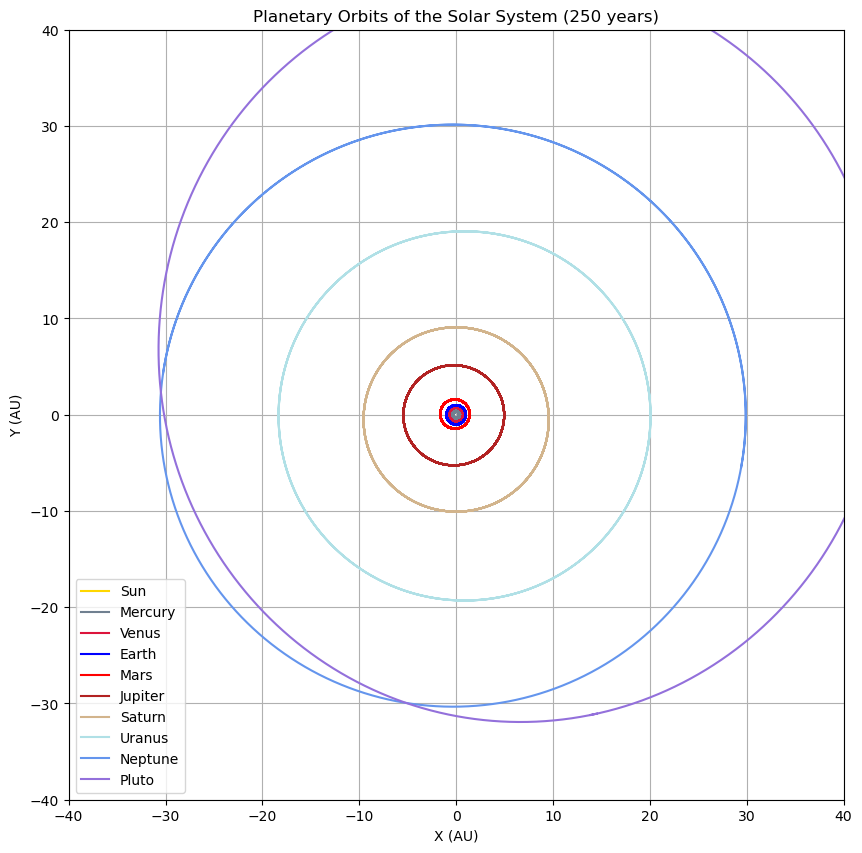

In [15]:
plt.figure(figsize=(10,10))
plt.plot(Sun.r[:,0], Sun.r[:,1], label='Sun', color="gold")
plt.plot(Mercury.r[:,0], Mercury.r[:,1], label='Mercury', color='slategrey')
plt.plot(Venus.r[:,0], Venus.r[:,1], label='Venus', color='crimson')
plt.plot(Earth.r[:,0], Earth.r[:,1], label='Earth', color='blue')
plt.plot(Mars.r[:,0], Mars.r[:,1], label='Mars', color='red')
plt.plot(Jupiter.r[:,0], Jupiter.r[:,1], label='Jupiter', color='firebrick')
plt.plot(Saturn.r[:,0], Saturn.r[:,1], label='Saturn', color='tan')
plt.plot(Uranus.r[:,0], Uranus.r[:,1], label='Uranus', color='powderblue')
plt.plot(Neptune.r[:,0], Neptune.r[:,1], label='Neptune',color='cornflowerblue')
plt.plot(Pluto.r[:,0], Pluto.r[:,1], label='Pluto',color='mediumpurple')
plt.xlabel('X (AU)')
plt.ylabel('Y (AU)')
plt.xlim(-40,40)
plt.ylim(-40,40)
plt.legend()
plt.grid()
plt.title('Planetary Orbits of the Solar System (250 years)');

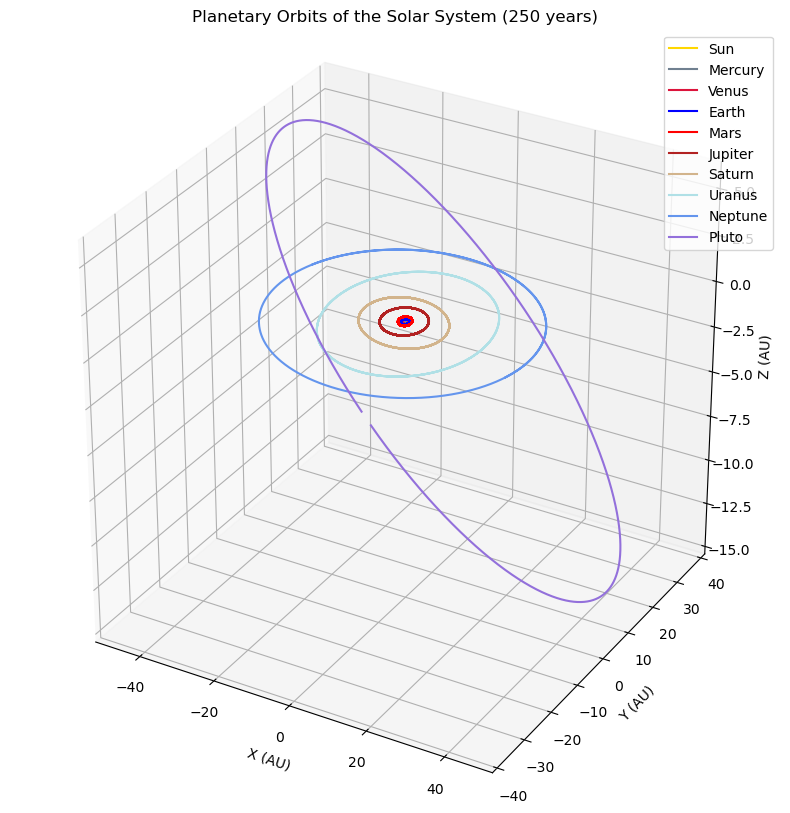

In [16]:
from mpl_toolkits import mplot3d
import time
from IPython.display import display, clear_output

for d in range(0,len(t),250):
    clear_output(wait=True)
    fig = plt.figure(figsize = (10,10))
    ax = fig.add_subplot(111, projection='3d')
    plt.box(False)
    ax.set_box_aspect([1,1,1])

    plt.plot(Sun.r[:d,0], Sun.r[:d,1], Sun.r[:d,2], label='Sun', color="gold")
    plt.plot(Mercury.r[:d,0], Mercury.r[:d,1], Mercury.r[:d,2], label='Mercury', color='slategrey')
    plt.plot(Venus.r[:d,0], Venus.r[:d,1], Venus.r[:d,2], label='Venus', color='crimson')
    plt.plot(Earth.r[:d,0], Earth.r[:d,1], Earth.r[:d,2], label='Earth', color='blue')
    plt.plot(Mars.r[:d,0], Mars.r[:d,1], Mars.r[:d,2], label='Mars', color='red')

    plt.plot(Jupiter.r[:d,0], Jupiter.r[:d,1], Jupiter.r[:d,2], label='Jupiter', color='firebrick')
    plt.plot(Saturn.r[:d,0], Saturn.r[:d,1], Saturn.r[:d,2], label='Saturn', color='tan')
    plt.plot(Uranus.r[:d,0], Uranus.r[:d,1], Uranus.r[:d,2], label='Uranus', color='powderblue')
    plt.plot(Neptune.r[:d,0], Neptune.r[:d,1], Neptune.r[:d,2], label='Neptune',color='cornflowerblue')
    plt.plot(Pluto.r[:d,0], Pluto.r[:d,1], Pluto.r[:d,2], label='Pluto',color='mediumpurple')

    plt.xlabel('X (AU)')
    plt.ylabel('Y (AU)')
    ax.set_zlabel('Z (AU)')
    plt.legend()
    plt.xlim(-50,50)
    plt.ylim(-40,40)
    ax.set_zlim(-15,6)
    plt.title('Planetary Orbits of the Solar System (250 years)')

    plt.show()
    time.sleep(0.0000001)


<span style="color:darkorchid">
    
    
### The code successfully plots the solar system in 2 and 3-dimenstions! I set the time loop to run for 250 years in order to let each planet finish at least one orbit. Pluto's orbit is the longest, obviously, and is 248 Earth years long, so this was the determining factor for how long to run the simulation. Also notice the drastic inclination differences between the rest of the planets and Pluto. The rocky planets have such small orbits that they appear as a tight cluster of rings, while the gas giants are more spread out. 